In [67]:
#SARIMA Algorithm

In [68]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install numpy 
!pip install --upgrade scikit-learn

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
import os
import matplotlib.style as style

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

sns.set(rc={'figure.figsize': (20, 5)})

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [109]:
#Load The data
df_train = pd.read_csv('/Users/unmeshmhatre/Desktop/Data_Analysis/24-09-2023/train.csv')
df_features = pd.read_csv('/Users/unmeshmhatre/Desktop/Data_Analysis/24-09-2023/features.csv')

In [110]:
df_train.shape , df_features.shape

((421570, 5), (8190, 12))

In [111]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [112]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [113]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [114]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [115]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [116]:
# To convert Date to datetime
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_features["Date"] = pd.to_datetime(df_features["Date"])

In [117]:
train_data = pd.merge(df_train, df_features, on=['Date','Store'], how='inner')

In [118]:
train_data.tail(30)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421540,45,41,2012-10-26,1954.67,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421541,45,42,2012-10-26,4894.78,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421542,45,44,2012-10-26,3144.09,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421543,45,46,2012-10-26,13329.25,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421544,45,52,2012-10-26,1104.16,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421545,45,54,2012-10-26,23.92,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421546,45,55,2012-10-26,3458.17,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421547,45,56,2012-10-26,937.72,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421548,45,58,2012-10-26,275.00,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421549,45,59,2012-10-26,191.98,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [119]:
train_data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [120]:
cols_to_drop = ["IsHoliday_y","MarkDown1", "MarkDown2", "MarkDown3","MarkDown4","MarkDown5","CPI","Temperature","Fuel_Price","Unemployment"]
train_data.drop(columns=cols_to_drop, inplace=True)

In [121]:
train_data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x
0,1,1,2010-02-05,24924.50,False
1,1,2,2010-02-05,50605.27,False
2,1,3,2010-02-05,13740.12,False
3,1,4,2010-02-05,39954.04,False
4,1,5,2010-02-05,32229.38,False
5,1,6,2010-02-05,5749.03,False
6,1,7,2010-02-05,21084.08,False
7,1,8,2010-02-05,40129.01,False
8,1,9,2010-02-05,16930.99,False
9,1,10,2010-02-05,30721.50,False


In [122]:
train_data.shape

(421570, 5)

In [123]:
duplicates = train_data[train_data.duplicated()]

# To Display the duplicate rows from dataset
if not duplicates.empty:
    print(duplicates)
else:
    print("No duplicate rows found.")

# Removing the duplicate rows
train_data = train_data.drop_duplicates()

No duplicate rows found.


In [124]:
# check for the outliers
forecasting_column = 'Weekly_Sales'

Data_1 = np.percentile(train_data[forecasting_column], 25)
Data_2 = np.percentile(train_data[forecasting_column], 75)


range_multiplier = 1.5 
Interquartile_Range = Data_2 - Data_1

lower_range = Data_1 - range_multiplier * Interquartile_Range
upper_range = Data_2 + range_multiplier * Interquartile_Range


detect_outliers = train_data[(train_data[forecasting_column] < lower_range) | (train_data[forecasting_column] > upper_range)]

In [126]:
detect_outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday_x
1,1,2,2010-02-05,50605.27,False
36,1,38,2010-02-05,115564.35,False
37,1,40,2010-02-05,66780.63,False
56,1,72,2010-02-05,98499.12,False
65,1,90,2010-02-05,76419.47,False
...,...,...,...,...,...
421497,45,92,2012-10-19,48108.38,False
421500,45,95,2012-10-19,48434.97,False
421538,45,38,2012-10-26,47799.07,False
421564,45,92,2012-10-26,54608.75,False


In [127]:
train_data = train_data[~train_data.index.isin(detect_outliers.index)]

In [128]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x
0,1,1,2010-02-05,24924.50,False
2,1,3,2010-02-05,13740.12,False
3,1,4,2010-02-05,39954.04,False
4,1,5,2010-02-05,32229.38,False
5,1,6,2010-02-05,5749.03,False
...,...,...,...,...,...
421563,45,91,2012-10-26,16330.84,False
421565,45,93,2012-10-26,2487.80,False
421566,45,94,2012-10-26,5203.31,False
421568,45,97,2012-10-26,6817.48,False


In [129]:
cols_to_drop = ["Store","Dept", "IsHoliday_x"]
train_data.drop(columns=cols_to_drop, inplace=True)

In [130]:
train_data

,Date,Weekly_Sales
0,2010-02-05,24924.50
2,2010-02-05,13740.12
3,2010-02-05,39954.04
4,2010-02-05,32229.38
5,2010-02-05,5749.03
...,...,...
421563,2012-10-26,16330.84
421565,2012-10-26,2487.80
421566,2012-10-26,5203.31
421568,2012-10-26,6817.48


In [131]:
train_data.rename(columns={'Date':'ds','Weekly_Sales':'y'}, inplace=True)

In [132]:
train_data

,ds,y
0,2010-02-05,24924.50
2,2010-02-05,13740.12
3,2010-02-05,39954.04
4,2010-02-05,32229.38
5,2010-02-05,5749.03
...,...,...
421563,2012-10-26,16330.84
421565,2012-10-26,2487.80
421566,2012-10-26,5203.31
421568,2012-10-26,6817.48


In [133]:
train_data.set_index('ds', inplace=True)
train_data

,y
ds,
2010-02-05,24924.50
2010-02-05,13740.12
2010-02-05,39954.04
2010-02-05,32229.38
2010-02-05,5749.03
...,...
2012-10-26,16330.84
2012-10-26,2487.80
2012-10-26,5203.31


In [134]:
#resample data on weekly basis
resampled_df = train_data.resample('W').mean()

In [135]:
resampled_df

,y
ds,
2010-02-07,10371.766994
2010-02-14,10945.257698
2010-02-21,10730.564159
2010-02-28,9917.680665
2010-03-07,10313.762879
...,...
2012-09-30,9994.956797
2012-10-07,10252.912027
2012-10-14,10409.566168


In [136]:
# To split the data in 80:20 ratio

train_size = int(len(resampled_df) * 0.80)
train_data_1 = resampled_df.iloc[:train_size]
test_data_1 = resampled_df.iloc[train_size:]

In [137]:
train_data_1.tail(5)

,y
ds,
2012-03-11,10352.812416
2012-03-18,10519.416761
2012-03-25,10607.530871
2012-04-01,10481.808055
2012-04-08,11080.157876


In [138]:
test_data_1

,y
ds,
2012-04-15,10386.491028
2012-04-22,10269.392024
2012-04-29,10116.420124
2012-05-06,10337.295664
2012-05-13,10685.687038
2012-05-20,10871.964559
2012-05-27,10833.467060
2012-06-03,10833.009012
2012-06-10,10865.805102


In [139]:
len(test_data_1)

29

In [140]:
p, d, q = 6, 1, 6
P, D, Q, s = 5, 1, 5, 7

In [141]:
# Calculate ACF and PACF value
acf_values = sm.tsa.acf(train_data_1['y'], nlags=20) 
pacf_values = sm.tsa.pacf(train_data_1['y'], nlags=20) 

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

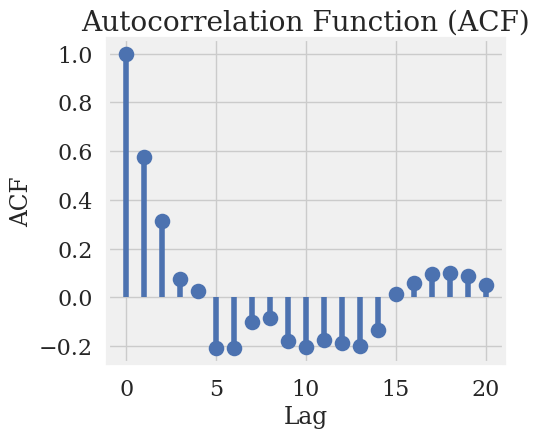

In [142]:
# Plot ACF
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(range(len(acf_values)), acf_values, markerfmt='bo', linefmt='b-', basefmt=' ')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')

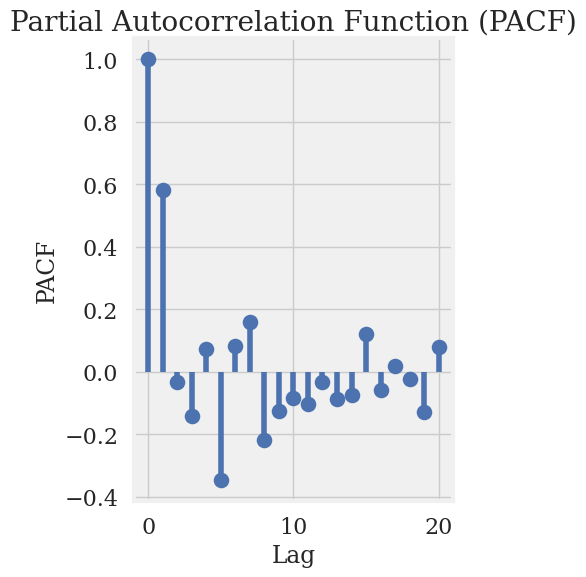

In [143]:
# Plot PACF
plt.subplot(122)
plt.stem(range(len(pacf_values)), pacf_values, markerfmt='bo', linefmt='b-', basefmt=' ')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [144]:
print("ACF Values:")
print(acf_values)

ACF Values:
[ 1.          0.57771383  0.31304449  0.07764243  0.0281867  -0.20784971
 -0.20568402 -0.10081718 -0.08329303 -0.17945507 -0.20343999 -0.17407426
 -0.18605706 -0.19903258 -0.13367014  0.01274182  0.05777837  0.0962189
  0.09941573  0.08909648  0.04953671]


In [145]:
print("\nPACF Values:")
print(pacf_values)


PACF Values:
[ 1.          0.58282634 -0.03188179 -0.14145079  0.07287291 -0.3461761
  0.08083721  0.15850097 -0.21973235 -0.1250801  -0.08262428 -0.1047873
 -0.03287488 -0.0865527  -0.07496091  0.1209451  -0.0578776   0.0186381
 -0.02377393 -0.13039761  0.0796216 ]


In [146]:
# To fit the model

sarima_model = SARIMAX(train_data_1['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56839D+00    |proj g|=  4.22445D-01


 This problem is unconstrained.



At iterate    5    f=  7.29266D+00    |proj g|=  3.00256D-02

At iterate   10    f=  7.28623D+00    |proj g|=  1.11201D-02

At iterate   15    f=  7.28143D+00    |proj g|=  2.13923D-02

At iterate   20    f=  7.27607D+00    |proj g|=  2.28342D-02

At iterate   25    f=  7.27388D+00    |proj g|=  1.80722D-02

At iterate   30    f=  7.27230D+00    |proj g|=  1.13168D-02

At iterate   35    f=  7.27187D+00    |proj g|=  5.05797D-03

At iterate   40    f=  7.27155D+00    |proj g|=  8.41231D-03

At iterate   45    f=  7.27138D+00    |proj g|=  1.90340D-03

At iterate   50    f=  7.27131D+00    |proj g|=  4.59607D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [148]:
forecast = sarima_results.forecast(steps=len(test_data_1))
forecast_mean = forecast.values

In [149]:
rmse_value = sqrt(mean_squared_error(test_data_1['y'], forecast_mean))

In [150]:
len(test_data_1['y']) , len(forecast_mean)

(29, 29)

In [151]:
rmse_value

400.21566092009164

In [152]:
forecast_mean

array([10638.59040458, 10622.41904206, 10385.26938688, 10687.98319786,
       10454.02575843, 10360.46834413, 10336.15616298, 10259.54226797,
       10329.9515816 ,  9926.82451833, 10351.98756537, 10584.20443735,
       10751.19114421, 10325.12981827, 10168.36430533, 10284.24094032,
        9890.11984426, 10185.50660194, 10671.74202744, 10982.33285986,
       10586.22428475, 10269.13747759, 10409.68857149, 10139.68307568,
       10201.8847592 , 10576.45291159, 10844.46244643, 10595.5327518 ,
       10242.28239774])

In [153]:
data_2 = pd.DataFrame()

In [154]:
data_2['Actual Sales'] = test_data_1['y']
data_2['Predicted Sales'] = forecast_mean

In [155]:
data_2

,Actual Sales,Predicted Sales
ds,,
2012-04-15,10386.491028,10638.590405
2012-04-22,10269.392024,10622.419042
2012-04-29,10116.420124,10385.269387
2012-05-06,10337.295664,10687.983198
2012-05-13,10685.687038,10454.025758
2012-05-20,10871.964559,10360.468344
2012-05-27,10833.467060,10336.156163
2012-06-03,10833.009012,10259.542268
2012-06-10,10865.805102,10329.951582


In [158]:
print("Root Mean Squared Error for the SARIMA Model:",rmse_value)

Root Mean Squared Error for the SARIMA Model: 400.21566092009164
